# Part 1: NY Taxi Fare Prediction

In [ ]:
# !?pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# !mkdir ~/.Paggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle competitions download -c new-york-city-taxi-fare-prediction 

In [ ]:
# !unzip new-york-city-taxi-fare-prediction

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
train = pd.read_csv("content/train.csv", nrows = 1000000)
test = pd.read_csv("content/test.csv")

In [ ]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


**Added haversine_distance column because i have to data cleaning on the basis of distance per kilometer**

In [ ]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [ ]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

PART 1 --> train CLEANSING 

Will perform the following activities
1.   Shape of train and test sets
2.   Check for NaNs and drop them (if any)
3.   Check for outliers and drop them (if any)
4.   Type conversion of relevant fields





**Droping column whose passenger count are less then zero**

In [ ]:
# index=[]
# for i in train:
#     index.append(i)

In [ ]:
train=train[train['passenger_count']>=0]

In [ ]:
# Check no of rows & columns in the dataset
print("Shape of the Training data :", train.shape)

# See all the columns in the dataset
print("All columns are :", list(train.columns))

Shape of the Training data : (1000000, 9)
All columns are : ['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'H_Distance']


In [ ]:
# Check datatypes & count of not-null values in each field
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
 8   H_Distance         999990 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 76.3+ MB


**Checking for null values in test and training data**

In [ ]:
#check for missing values in train data
#missing_value=["N/a","na",np.nan]
#train = train.read_csv("content/train.csv",na_values=missing_value)
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
H_Distance           10
dtype: int64

In [ ]:
# check for missing value in test data
test.isnull().sum(axis=0)

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
H_Distance           0
dtype: int64

In [ ]:
#drop the missing values
#train = train["fare_amount"]>=0
train = train.dropna()

In [ ]:
# check target value
train["fare_amount"]
len(train)

999990

In [ ]:
train.isnull().sum(axis=0)

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
H_Distance           0
dtype: int64

In [ ]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


**Checking the fare_amount_criteria**

In [ ]:
#Look for no. of non-positive fare_amount values.
(train["fare_amount"]<=0).sum()

67

In [ ]:
# Remove the non-positive fare_amount values.
train = train[train["fare_amount"]>0]


In [ ]:
(train["fare_amount"]<=0).sum()

0

**Below this i was calculating manhattan_distance but further it's graph with fare amount per passanger was wrong**


In [ ]:
# l1, l2 = abs(train["pickup_longitude"] - train["dropoff_longitude"]), abs(train["pickup_latitude"] - train["dropoff_latitude"])
# manhattan_dist = l1 + l2

**Added a column name fare_by_H_distance for removing outliners**<br>
**Rupess Per Kilometer**

In [ ]:
fare_by_H_distance=[]
fare_by_H_distance = train["fare_amount"]/train['H_Distance']
train['fare_by_H_distance']=fare_by_H_distance
# len(train)

**Added a column name effective_dist_by_fare which is fare per (distance*passenger  for removing outliners**

In [ ]:
effective_dist_by_fare =  train["fare_amount"]/(train['H_Distance'] * train["passenger_count"])
len(effective_dist_by_fare)
train['effective_dist_by_fare']=effective_dist_by_fare

## Removing Outliers

**Criteria was that.....Before this drop, we have some inf and NA value after repeating multiple time came to this conclusion**

In [ ]:
train = train[train['effective_dist_by_fare']>=.2]
train = train[train['effective_dist_by_fare']<=7]

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='effective_dist_by_fare'>

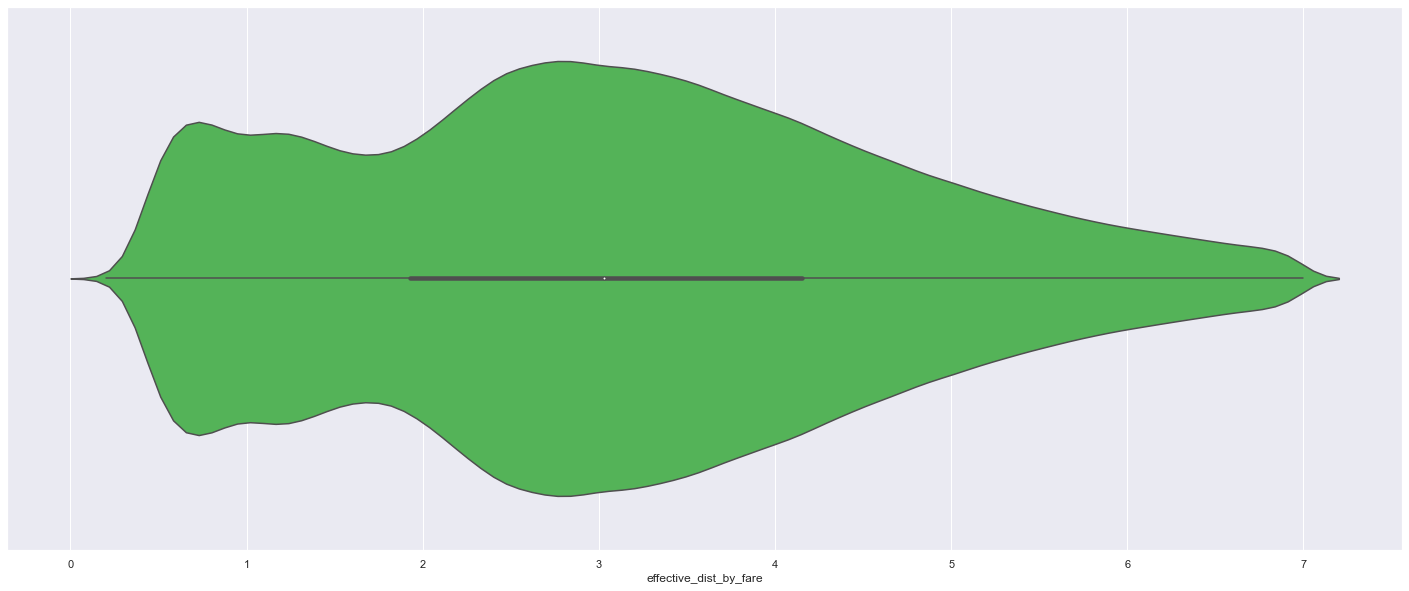

In [ ]:
plt.figure(figsize=(25,10))
sns.violinplot(train["effective_dist_by_fare"], color='#44C34A')

In [ ]:
len(train)

900721

In [ ]:
train.describe().columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'fare_by_H_distance', 'effective_dist_by_fare'],
      dtype='object')

### DATA VISUALISATION

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='passenger_count', ylabel='fare_amount'>

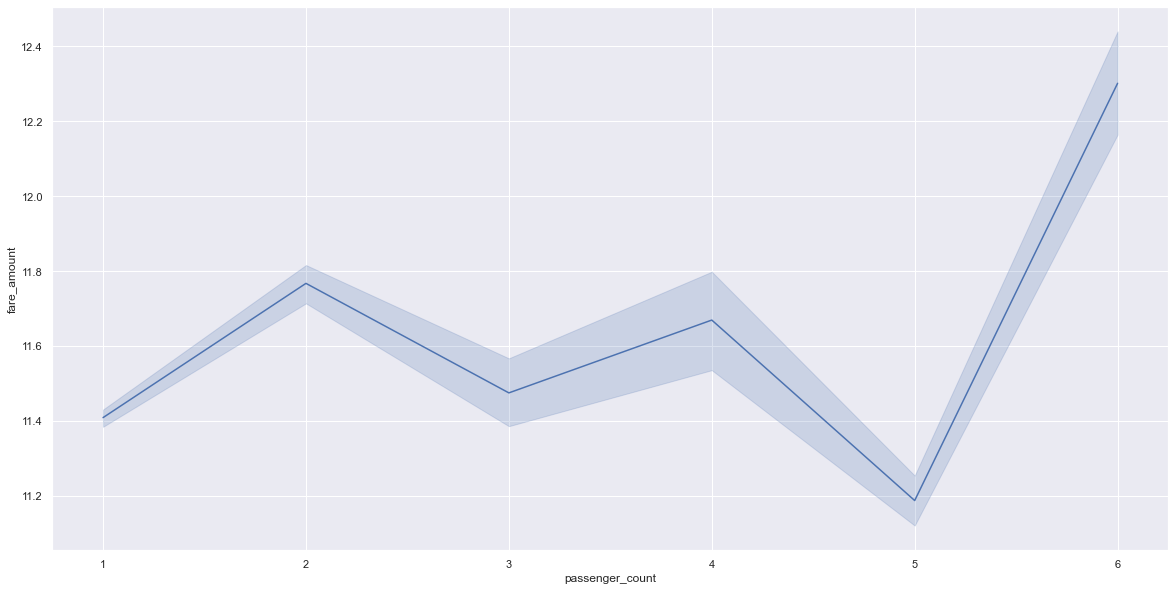

In [ ]:
sns.lineplot( train['passenger_count'], train['fare_amount'],data=train)

<AxesSubplot:xlabel='fare_amount', ylabel='H_Distance'>

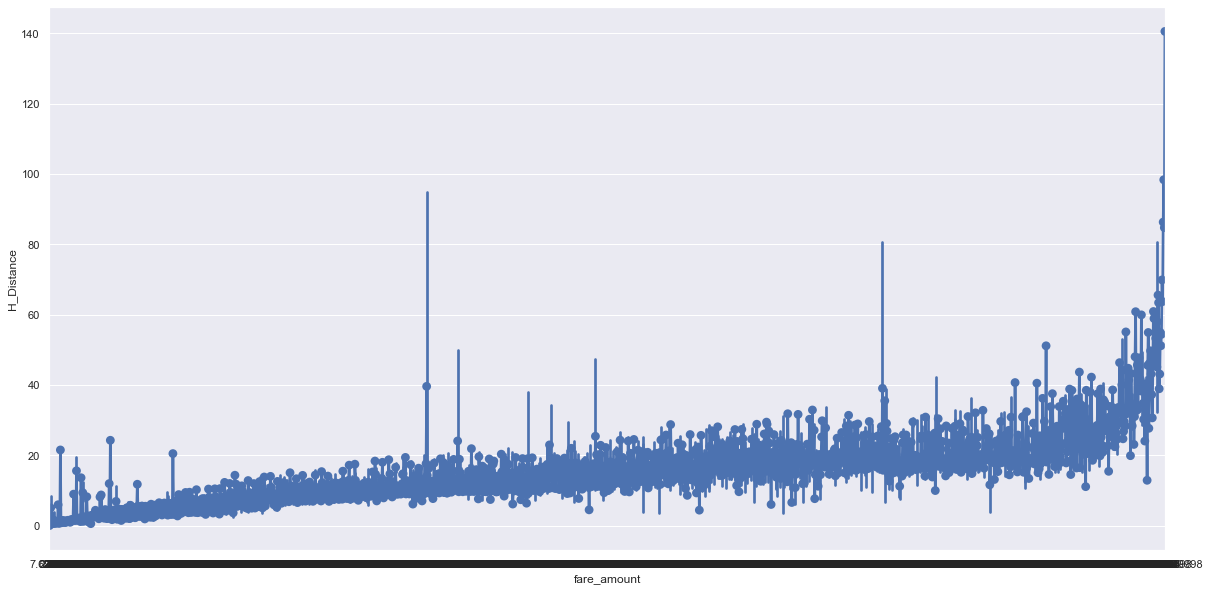

In [ ]:
sns.pointplot(x = train["fare_amount"], y = train["H_Distance"], data = train)

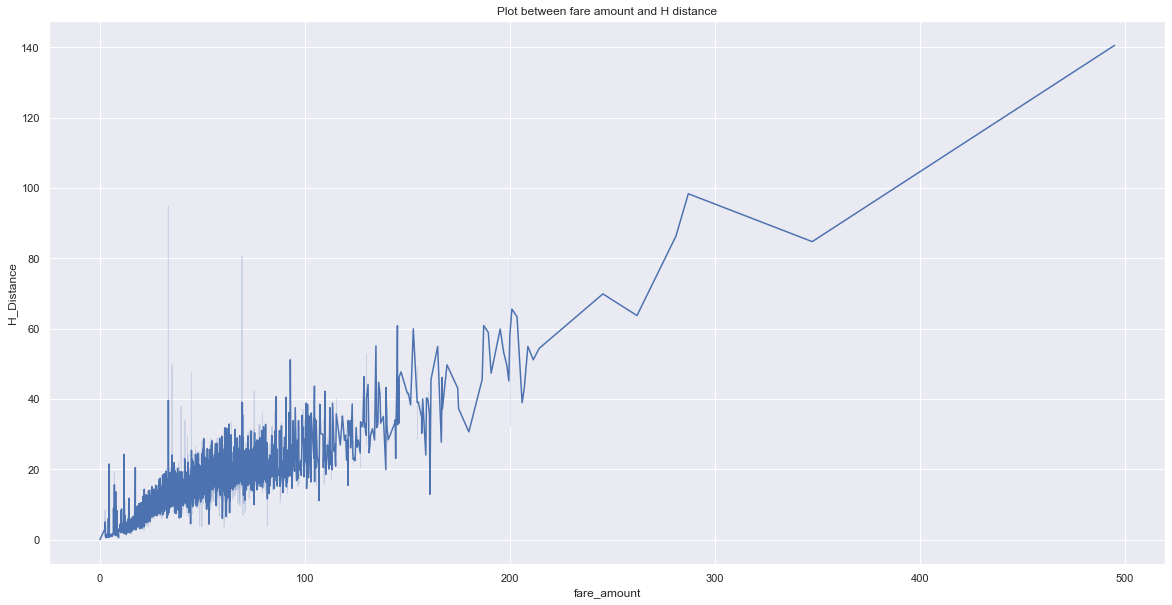

In [ ]:
sns.lineplot(x="fare_amount", y="H_Distance", data=train) 
plt.title('Plot between fare amount and H distance')
plt.show()

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='fare_by_H_distance', ylabel='passenger_count'>

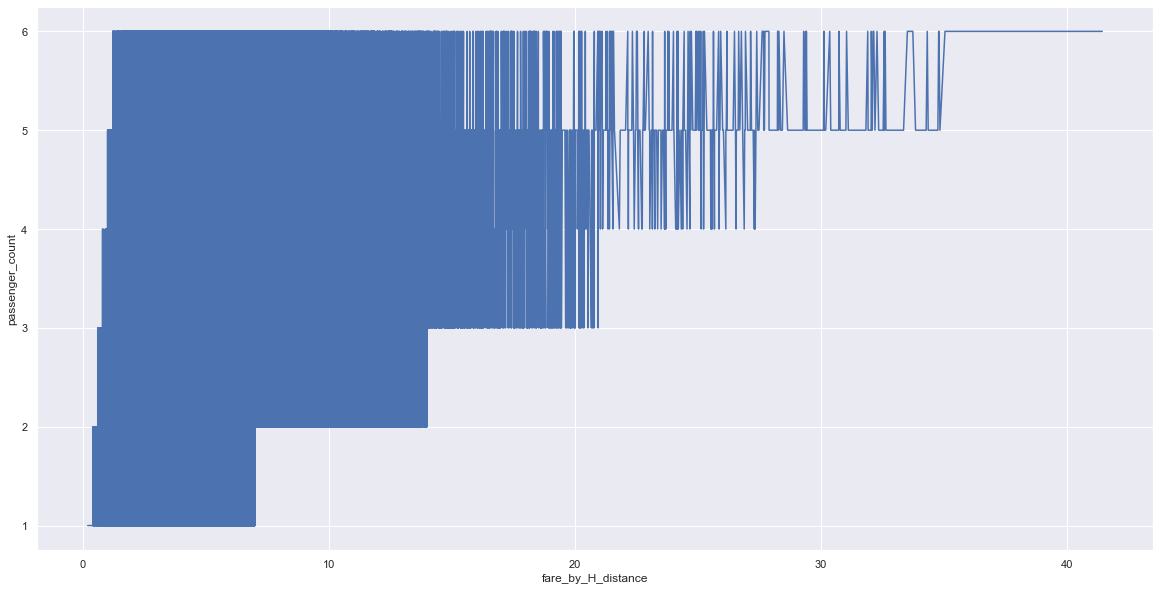

In [ ]:
sns.lineplot(train['fare_by_H_distance'],train['passenger_count'])

In [ ]:
# sns.lineplot(train['fare_amount'],train['pass'])

<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

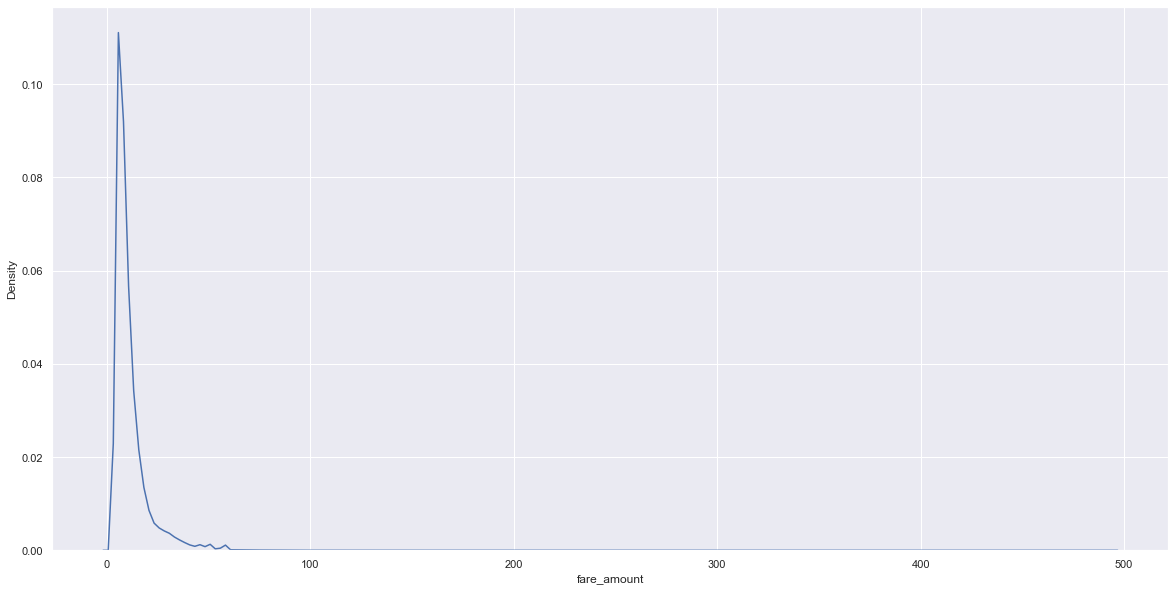

In [ ]:
sns.kdeplot(train["fare_amount"])

**Next let us explore the pickup latitude and longitudes**, 

Googling gave me this info
*   Latitudes range from -90 to 90.
*   Longitudes range from -180 to 180.

The above describe clearly shows some outliers. Let's filter them


Check the data types of each column

In [ ]:
train.dtypes

key                        object
fare_amount               float64
pickup_datetime            object
pickup_longitude          float64
pickup_latitude           float64
dropoff_longitude         float64
dropoff_latitude          float64
passenger_count             int64
H_Distance                float64
fare_by_H_distance        float64
effective_dist_by_fare    float64
dtype: object

key and pickup_datetime seem to be datetime columns which are in object format. Let's convert them to datetime

In [ ]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [ ]:
#Convert for test data
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [ ]:
#check the dtypes after conversion
train.dtypes

key                            datetime64[ns]
fare_amount                           float64
pickup_datetime           datetime64[ns, UTC]
pickup_longitude                      float64
pickup_latitude                       float64
dropoff_longitude                     float64
dropoff_latitude                      float64
passenger_count                         int64
H_Distance                            float64
fare_by_H_distance                    float64
effective_dist_by_fare                float64
dtype: object

Now, for **EDA**. The following are my considerations - 
1. Does the number of passengers affect the fare? 
2. Does the date and time of pickup affect the fare?
3. Does the day of the week affect the fare?
4. Does the distance travelled affect the fare?

First, let's split the datetime field 'pickup_datetime' to the following - 
* year
* month
* date
* hour
* day of week

Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare.
Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

We can calulate the distance in a sphere when latitudes and longitudes are given by [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)

**haversine(θ) = sin²(θ/2)**

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

**a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)**

**c = 2 * atan2( √a, √(1−a) )**

**d = R ⋅ c**

**d = Haversine distance**

*Refer [this](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula) page for more info and examples on Haversine formula*

Is this distance equal to the road travel distance? Do we have to do something else?


In [ ]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [ ]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

Now that we have calculated the distance, we shall create columns for the following -


*   year
*   month
*   date
*   hour
*   day of week






In [ ]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

<center><B>Correlation</center>

In [ ]:
# print(data.corr())

<AxesSubplot:>

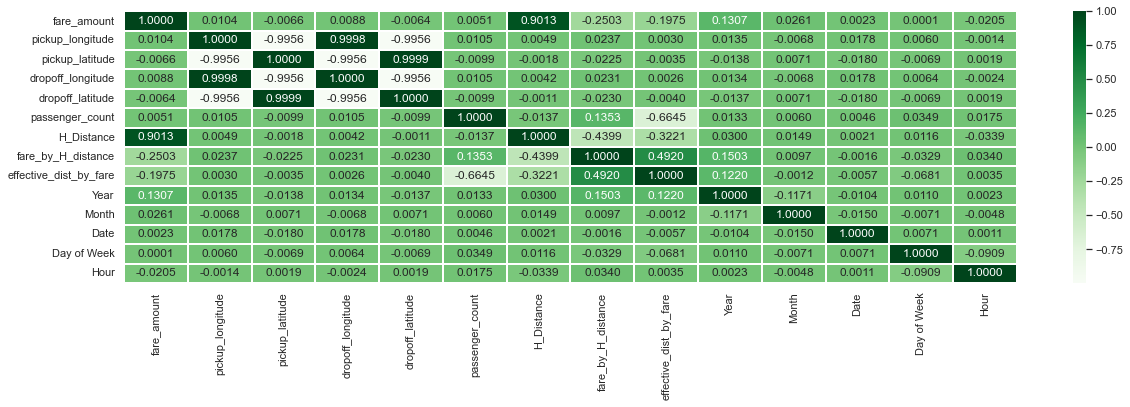

In [ ]:
data = pd.DataFrame(train)
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(data.corr(),annot=True,cmap="Greens",fmt='.4f',linewidths=2)

**1. Does the number of passengers affect the fare?**

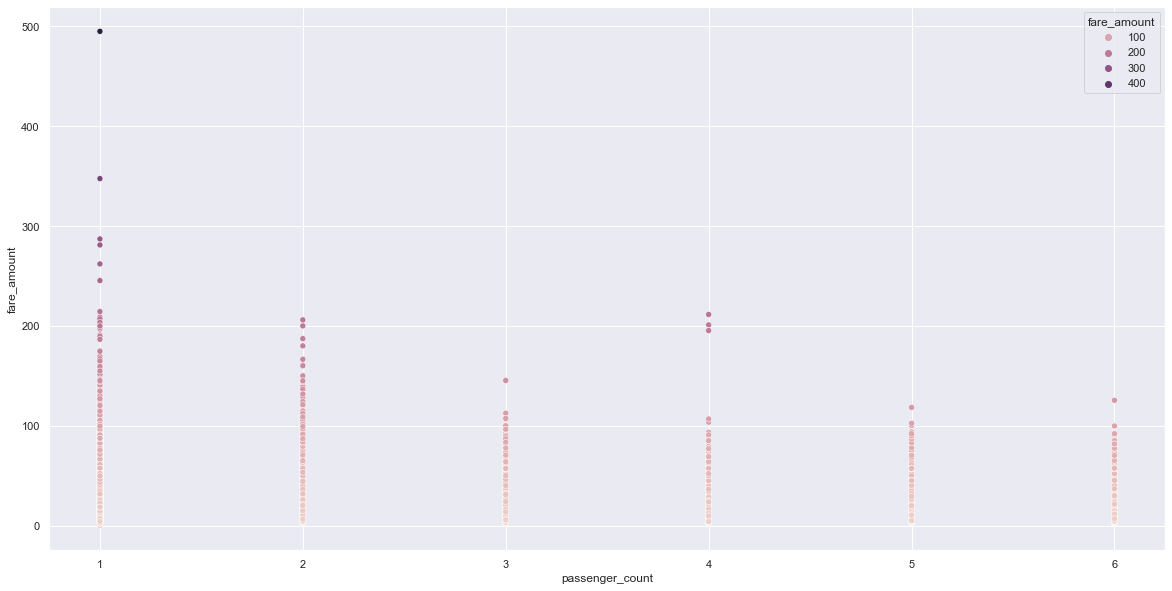

In [ ]:
sns.scatterplot(x='passenger_count',y='fare_amount',data=train,hue='fare_amount')
plt.show()

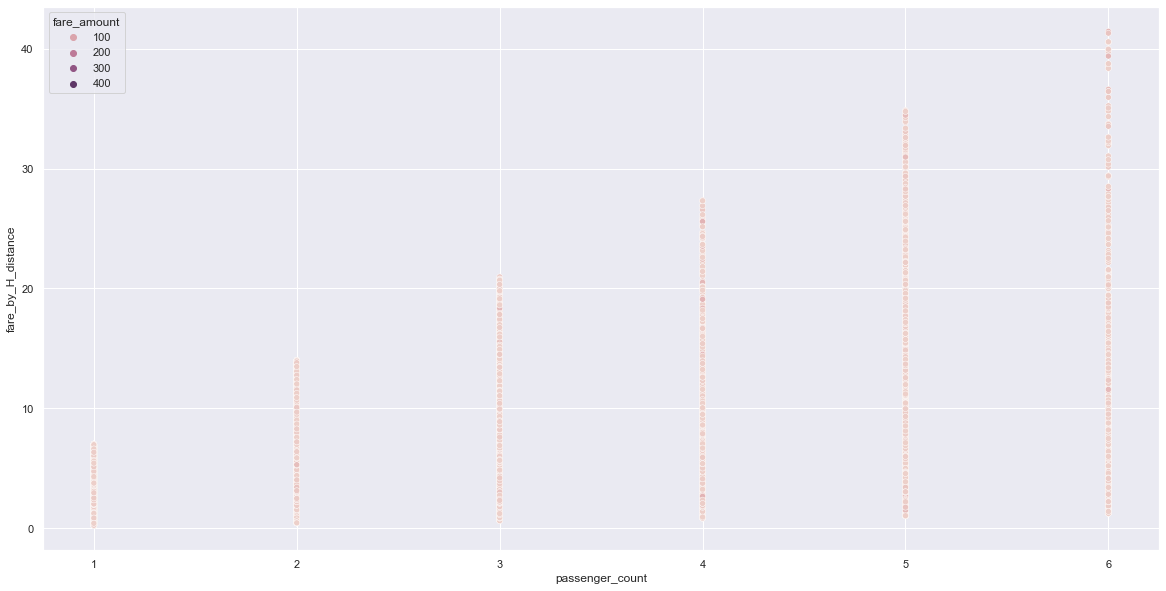

In [ ]:
sns.scatterplot(x='passenger_count',y='fare_by_H_distance',data=train,hue='fare_amount')
plt.show()

**2. Does the date and time of pickup affect the fare?**

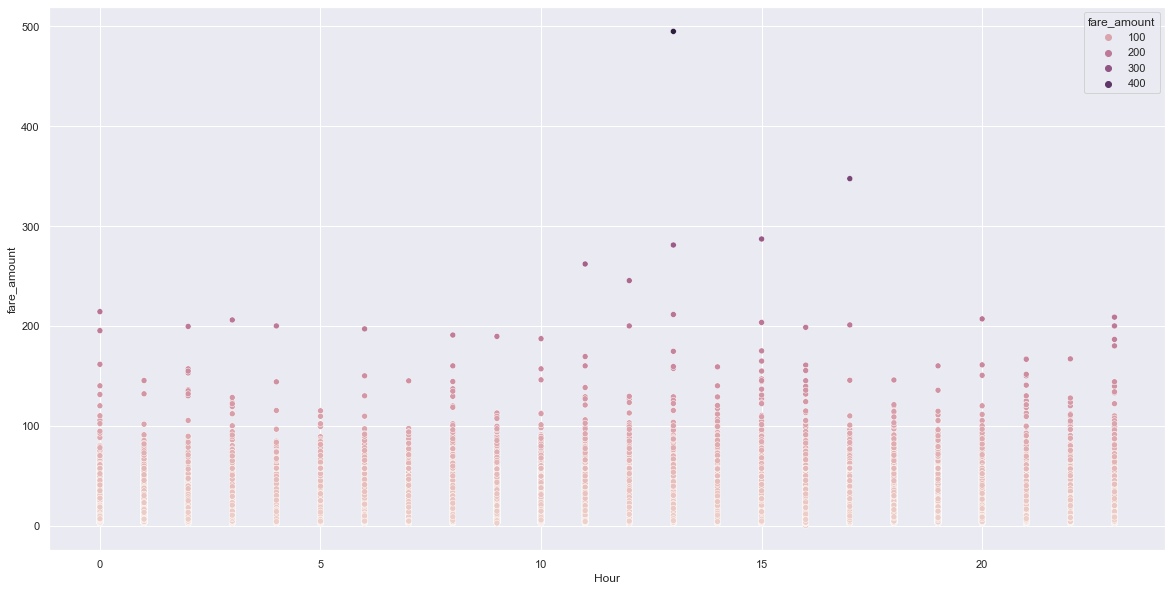

In [ ]:
sns.scatterplot(x='Hour',y='fare_amount',data=train,hue='fare_amount')
plt.show()

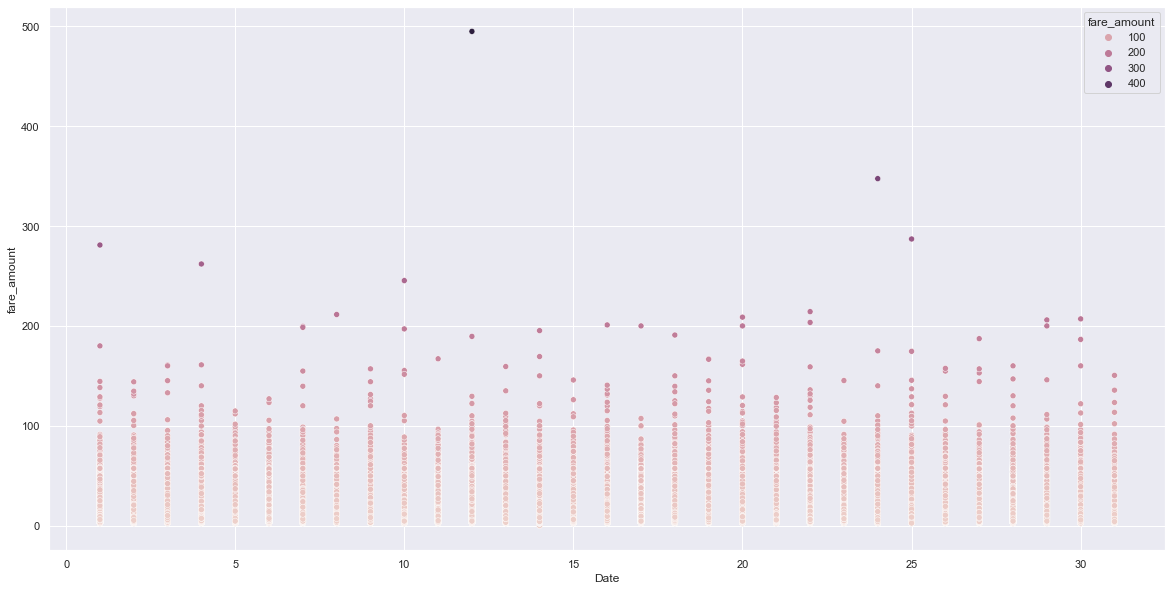

In [ ]:
sns.scatterplot(x='Date',y='fare_amount',data=train,hue='fare_amount')
plt.show()

**3. Does the day of the week affect the fare?**

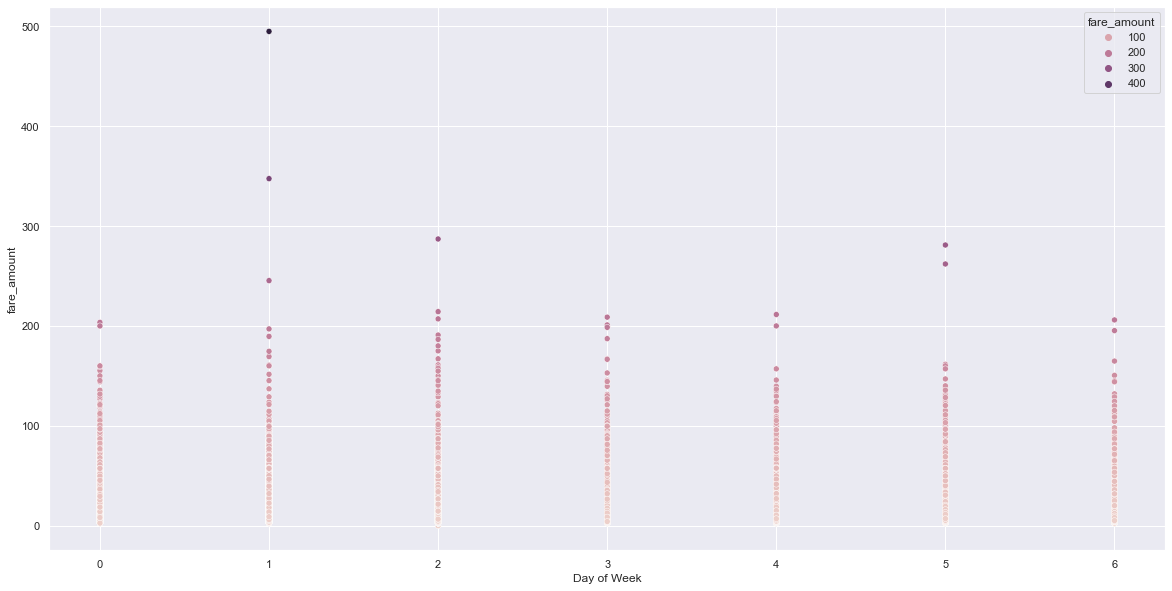

In [ ]:
sns.scatterplot(x='Day of Week',y='fare_amount',data=train,hue='fare_amount')
plt.show()

**4. Does the distance affect the fare?**

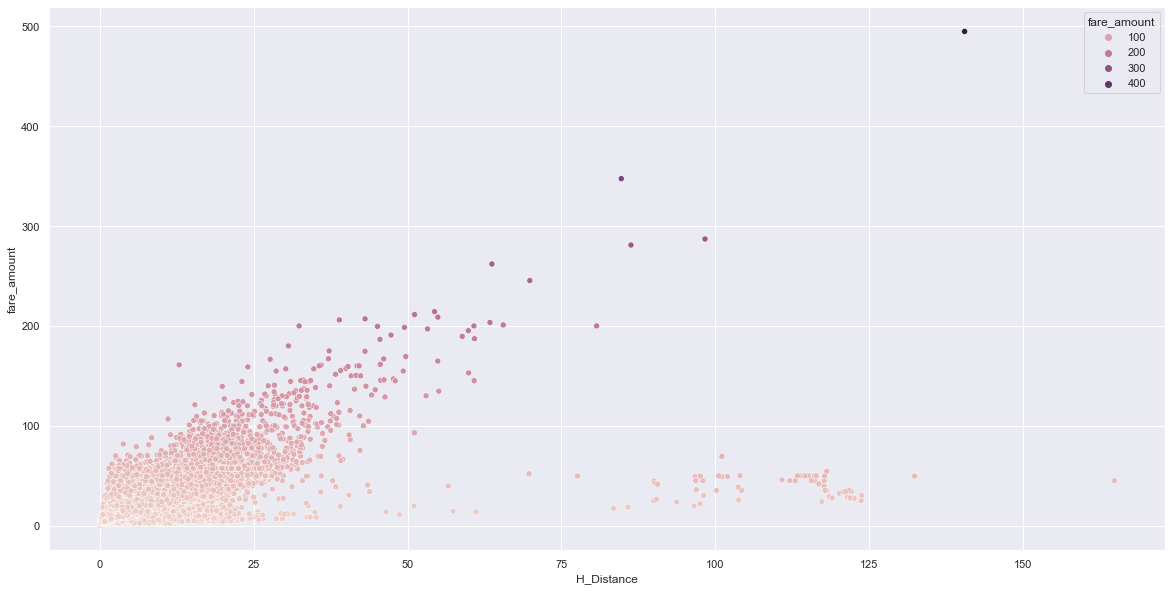

In [ ]:
sns.scatterplot(x='H_Distance',y='fare_amount',data=train,hue='fare_amount')
plt.show()

# Part B Scaling and standardization

In [ ]:
import sklearn

**Intially i was doing standard Scaling but later some anonymous person said me to use standard library**

**(column-mean_colum)/standard deviation**

In [ ]:
t1=train

In [ ]:
t1_mean=[]
t1_mean=t1.mean(axis=0)
t1_mean

C:\Users\Dell\AppData\Local\Temp\ipykernel_504\739032266.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



fare_amount                 11.477332
pickup_longitude           -73.924183
pickup_latitude             40.700741
dropoff_longitude          -73.923091
dropoff_latitude            40.701153
passenger_count              1.732893
H_Distance                   3.541245
fare_by_H_distance           3.989642
effective_dist_by_fare       3.098451
Year                      2011.721712
Month                        6.259220
Date                        15.694081
Day of Week                  3.051276
Hour                        13.522837
dtype: float64

In [ ]:
t2_stand=[]
t2_stand=t1.std(axis=0)
t2_stand


key                       675 days 22:09:50.208048344
fare_amount                                  9.479773
pickup_datetime           675 days 22:09:50.208048344
pickup_longitude                             2.404919
pickup_latitude                              2.376643
dropoff_longitude                            2.404957
dropoff_latitude                             2.376602
passenger_count                               1.33484
H_Distance                                   3.754703
fare_by_H_distance                            1.60505
effective_dist_by_fare                       1.555294
Year                                         1.862391
Month                                        3.435017
Date                                         8.687745
Day of Week                                  1.956325
Hour                                         6.567753
dtype: object

### Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_object = StandardScaler()
scale=train
for i in train:
    # print(i)
    if(i!='key' or i!='pickup_longitude' or i!='pickup_latitude' or i!='dropoff_longitude' or i!='dropoff_latitude'):
        scale[i]=scaler_object.fit_transform(train[[i]])

In [ ]:
scale

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,fare_by_H_distance,effective_dist_by_fare,Year,Month,Date,Day of Week,Hour
0,-1.483355,-0.736023,-1.483355,0.033212,0.008658,0.033880,0.004681,-0.549050,-0.668623,0.234293,0.814794,-1.461408,-0.075464,-0.079892,-1.559699,0.529430
1,-1.181581,0.572025,-1.181581,-0.038199,0.004444,-0.023359,0.034020,-0.549050,1.307398,-1.239634,-0.706287,-0.924464,-1.531062,-1.230939,-1.048536,0.377171
2,-0.309704,-0.609438,-0.309704,-0.024348,0.025468,-0.028338,0.020790,0.200104,-0.573074,0.070078,-0.673436,-0.387519,0.506775,0.265422,-0.026210,-2.058976
3,0.055964,-0.398462,0.055964,-0.026174,0.013634,-0.028473,0.023958,-0.549050,-0.197612,-0.771892,-0.223581,0.149425,-0.657703,0.610736,0.996116,-1.449939
4,-1.088931,-0.651633,-1.088931,-0.018259,0.028303,-0.013956,0.034759,-0.549050,-0.410709,-0.833946,-0.287620,-0.924464,-0.948823,-0.770520,-1.048536,-0.993162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,1.239189,0.899038,1.239189,0.021316,0.030869,0.052628,0.031090,0.200104,0.770376,-0.548922,-0.992838,1.223314,-0.075464,1.531574,1.507279,1.290726
999995,1.351552,-0.472304,1.351552,-0.021827,0.035718,-0.015013,0.031121,-0.549050,-0.442507,-0.165582,0.402125,1.223314,0.797895,-0.310101,0.996116,1.138467
999997,0.603951,-0.103097,0.603951,-0.022554,0.021204,-0.029234,0.025686,2.447567,-0.473940,1.227609,-1.225781,0.686370,-0.657703,1.186260,0.484953,0.072652
999998,-0.370368,-0.482853,-0.370368,-0.023341,0.024716,-0.022346,0.017659,-0.549050,-0.452383,-0.152707,0.415413,-0.387519,0.215656,-0.885625,0.484953,-2.058976


# Part C: Pipeline

**Use pipeline changing the column name and scaling and Removing outliers**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [ ]:
class Remove_unnecessary_data:
    def fit(self):
        pass
    def transform(self,df):
        ls = ['fare_amount', 'passenger_count']
        for i in ls:
            df = df[df[i] > 0]
        # in kaggle comment was written that lattitude and longitude should should be appropriate ( )
        df = df[df['pickup_longitude']<=0]
        df = df[df['dropoff_longitude']<=0]
        df = df[df['pickup_latitude']>=0]
        df = df[df['dropoff_latitude']>=0]
        return df
class scalling:
    def fit(self):
        pass
    def transform(self,df):
        print('Abhay')
        scaler_object = StandardScaler()
        scale = df
        scale['fare_amount'] = scaler_object.fit_transform(df[['fare_amount']])
        scale['passenger_count'] = scaler_object.fit_transform(df[['passenger_count']])
        #scale['effective_dist_by_fare'] = scaler_object.fit_transform(df[['effective_dist_by_fare']])
        return scale
class minkowski_distance:
    def fit(self):pass
    def transform(self, df):

        l1, l2 = abs(df["pickup_longitude"] - df["dropoff_longitude"]), abs(train["pickup_latitude"] - df["dropoff_latitude"])
        manhattan_dist = l1 + l2
        effective_fare_by_dist_by_passenger_count = df["fare_amount"] / (manhattan_dist * df["passenger_count"])
        df['effective_fare_by_dist_by_passenger_count'] = effective_fare_by_dist_by_passenger_count
        return df
class change_key:
    def fit(self):
        pass
    def transform(self,df):
        key_li=[]
        for i in range(len(df)):
            key_li.append("Abhay"+"_"+str(i))
        df['key']=key_li
        return df

# l1, l2 = abs(train["pickup_longitude"] - train["dropoff_longitude"]), abs(train["pickup_latitude"] - train["dropoff_latitude"])
# manhattan_dist = l1 + l2  

In [ ]:
pipe = Pipeline([
    ('Scalling', scalling()),
    ('Unnecessary', Remove_unnecessary_data()),
    ('man_hatten_distance_added',minkowski_distance()),
    ('Change_key', change_key())
])

In [ ]:
train1 = pd.read_csv("content/train.csv",nrows=100)
data = pipe.transform(train1)

Abhay


<AxesSubplot:>

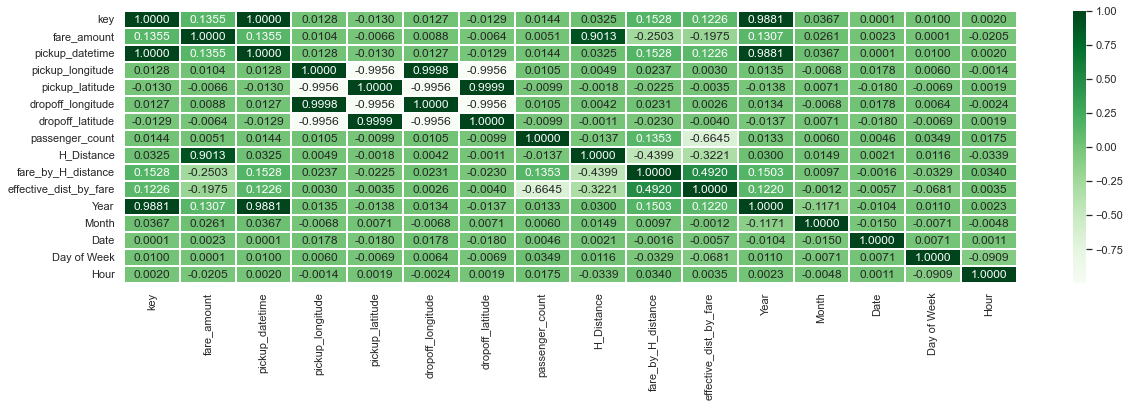

In [ ]:
data_p = pd.DataFrame(train)
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(data_p.corr(),annot=True,cmap="Greens",fmt='.4f',linewidths=2)

In [ ]:
data

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,effective_fare_by_dist_by_passenger_count
32,Abhay_0,2.966598,2009-01-09 16:10:00 UTC,-73.873027,40.773883,-73.984545,40.769545,0.970748,0.074810
41,Abhay_1,0.148449,2011-10-15 10:55:24 UTC,-74.003899,40.725514,-73.976484,40.765537,0.218230,0.016680
54,Abhay_2,2.107734,2013-11-10 01:12:19 UTC,-73.974497,40.751603,-73.934927,40.851567,1.723266,0.029927
58,Abhay_3,0.524203,2012-07-19 23:53:14 UTC,-74.002113,40.739582,-73.971918,40.791899,0.218230,0.058866
67,Abhay_4,0.899956,2014-04-29 18:28:00 UTC,-73.970323,40.750840,-73.998392,40.724862,3.228303,0.006844
68,Abhay_5,0.228968,2015-04-12 10:19:05 UTC,-73.979279,40.723438,-74.004608,40.746948,3.228303,0.001740
73,Abhay_6,0.041091,2012-05-21 15:20:00 UTC,-73.977788,40.771838,-73.966200,40.778113,0.218230,0.004620
75,Abhay_7,0.708053,2010-08-16 01:33:00 UTC,-73.961933,40.795585,-73.962253,40.764817,0.218230,0.079669
92,Abhay_8,0.161869,2015-04-03 16:21:30 UTC,-73.981056,40.774265,-73.959045,40.780674,0.218230,0.018192


# Part D Using K flod Cross validation

In [ ]:
import math

In [ ]:

temp = 10
Train=train.copy()
df = pd.DataFrame(Train, index = None)
Len_of_fold = len(df.axes[0])//10
answer = temp*temp
while True: 
    pd.concat([Train.iloc[temp*Len_of_fold + Len_of_fold : ],Train.iloc[0:temp*Len_of_fold+1]],axis=0)
    test_data = Train.iloc[temp*Len_of_fold: temp*Len_of_fold + Len_of_fold]
    fare_amount_test = test_data["fare_amount"] 
    weights = np.dot(np.linalg.pinv(Train.iloc[0:temp*Len_of_fold+1]), Train.iloc[0:temp*Len_of_fold+1]["fare_amount"])
    predicted_value = np.dot(test_data, weights)
    MSE = np.square(np.subtract(predicted_value, fare_amount_test)).mean()
    RMSE = math.sqrt(MSE)
    # answer = min(answer, RMSE)
    if(RMSE<answer):
        answer=RMSE
    temp = temp - 1
    if(temp==0):
        break
print("The minimum RMSE value is ", answer)

The minimum RMSE value is  3.280386036421031e-05


# Part E: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error
from statistics import linear_regression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
X_cols=['H_Distance', 'Year']
y_col =['fare_amount']
X = train[X_cols].values
y = train[y_col].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# LinearRegression (Matrix Based)

In [ ]:
L_R=LinearRegression()
L_R.fit(X_train,y_train)
Linear_test = L_R.predict(X_test)
mean_squared_error(Linear_test,y_test)

0.16887925208922716

In [ ]:
L_R.score(X_train,y_train)

0.8187553629188452

In [ ]:
L_R.coef_

array([[0.89143211, 0.10382769]])

# SGD (Optimization Based)

In [ ]:
sgd=SGDRegressor(max_iter=80,eta0= 0.0000001)
sgd.fit(X_train,y_train)
SGD_Test = sgd.predict(X_test)
mean_squared_error(SGD_Test,y_test)

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.9686931979638375

In [ ]:
sgd.score(X_train,y_train)

0.0357800806257732

In [ ]:
sgd.coef_

array([0.01961428, 0.00285442])

# KNeighborsRegressor (Non-parametric)

In [ ]:

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train,y_train)
KX_test =neigh.predict(X_test)
mean_squared_error(KX_test,y_test)

0.19396610319602048

In [ ]:
neigh.score(X_train,y_train)

0.9382389534254966